<a href="https://colab.research.google.com/github/nogast/explore_spider/blob/main/explore_spider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

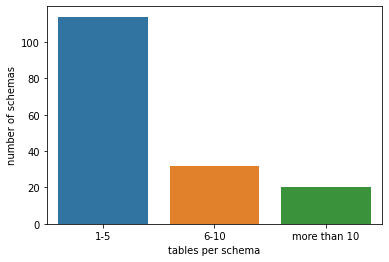

In [9]:
import sqlite3
import os
import json
import seaborn as sns
import pandas as pd


base_path = 'spider/database/'


def tables_per_schema():
    db_dirs = os.scandir(base_path)
    one_to_five = 0
    six_to_ten = 0
    more_than_ten = 0
    for db_dir in db_dirs:
        db_name = db_dir.name
        if not db_name.startswith('.'): # I work on a Mac, which adds a directory called .DS_Store that I want to ignore
            table_count = 0
            path = base_path + db_name + "/" + db_name + ".sqlite"
            conn = sqlite3.connect(path)
            cursor = conn.cursor()
            count = cursor.execute('select count(*) from sqlite_master as tables where type=\'table\';')
            for num in count:
                table_count = num[0] # it's a tuple
            # tables_per_s.append(table_count)
            if table_count <= 5:
                one_to_five += 1
            elif table_count <= 10:
                six_to_ten += 1
            else:
                more_than_ten += 1
            conn.close()
    data = {'tables per schema':['1-5','6-10','more than 10'],'number of schemas':[one_to_five, six_to_ten, more_than_ten]}
    df = pd.DataFrame(data=data)
    sns.barplot(data=df, x='tables per schema', y='number of schemas')

tables_per_schema()

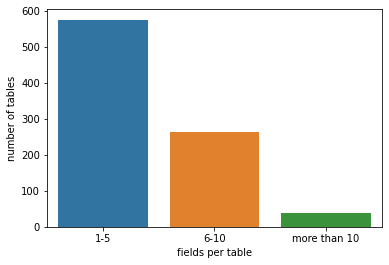

In [10]:
def fields_per_table():
    db_dirs = os.scandir(base_path)
    fields_per_table = []
    one_to_five = 0
    six_to_ten = 0
    more_than_ten = 0
    for db_dir in db_dirs:
        db_name = db_dir.name
        if not db_name.startswith('.'):  # it's a Mac thing. Mac adds a dir called .DS_Store, which we don't want.
            path = base_path + db_name + "/" + db_name + ".sqlite"
            conn = sqlite3.connect(path)
            cursor = conn.cursor()
            tables = cursor.execute('select name from sqlite_master where type=\'table\';').fetchall()
            table_names = sorted(list(zip(*tables))[0])
            for table_name in table_names:
                data = cursor.execute('select * from '+table_name)
                cols_num = len(data.description)
                fields_per_table.append(cols_num)
                if cols_num <= 5:
                    one_to_five += 1
                elif cols_num <= 10:
                    six_to_ten += 1
                else:
                    more_than_ten += 1
            conn.close()
    data = {'fields per table': ['1-5', '6-10', 'more than 10'],
            'number of tables': [one_to_five, six_to_ten, more_than_ten]}
    df = pd.DataFrame(data=data)
    sns.barplot(data=df, x='fields per table', y='number of tables')

fields_per_table()

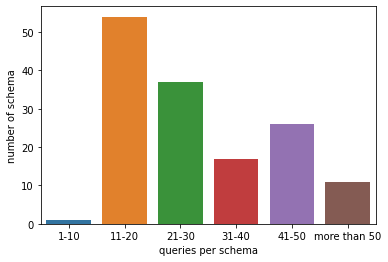

In [11]:
def queries_per_schema():
    queries_per_db = dict()
    files = ['spider/train_spider.json', 'spider/train_others.json']
    one_to_ten = 0
    eleven_to_twenty = 0
    twenty_one_to_thirty =0
    thirty_one_to_forty = 0
    forty_one_to_fifty = 0
    more_than_fifty = 0
    for file in files:
        f1 = open(file)
        data = json.load(f1)
        for i in range(len(data)):
            db_name = data[i]['db_id']
            query = data[i]['query']
            if db_name in queries_per_db:
                if not query in queries_per_db[db_name]:
                    queries_per_db[db_name].append(query)
            else:
                queries_per_db[db_name] = []
                queries_per_db[db_name].append(query)
        f1.close()
    for db in queries_per_db:
        num_of_queries = len(queries_per_db[db])
        if num_of_queries <= 10:
            one_to_ten += 1
        elif num_of_queries <= 20:
            eleven_to_twenty += 1
        elif num_of_queries <= 30:
            twenty_one_to_thirty += 1
        elif num_of_queries <= 40:
            thirty_one_to_forty += 1
        elif num_of_queries <= 50:
            forty_one_to_fifty += 1
        else:
            more_than_fifty += 1
    data = {'queries per schema': ['1-10', '11-20', '21-30','31-40','41-50','more than 50'],
                'number of schema': [one_to_ten, eleven_to_twenty, twenty_one_to_thirty, thirty_one_to_forty, forty_one_to_fifty, more_than_fifty]}
    df = pd.DataFrame(data=data)
    sns.barplot(data=df, x='queries per schema', y='number of schema')

queries_per_schema()

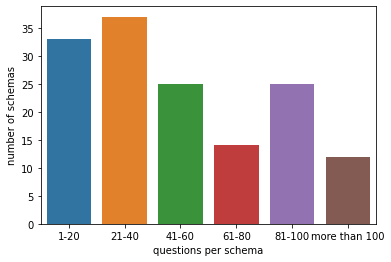

In [12]:
def questions_per_schema(): # questions appear only once (otherwise you might confuse the model by teaching it several queries for the same question), so no need to check for duplicates
    questions_per_db = dict()
    one_to_twenty = 0
    twenty_to_forty = 0
    forty_to_sixty = 0
    sixty_to_eighty = 0
    eighty_to_hundred = 0
    more_than_hundred = 0
    f1 = open('spider/train_spider.json')
    data1 = json.load(f1)
    for i in range(len(data1)):
        db_name = data1[i]['db_id']
        if db_name in questions_per_db:
            questions_per_db[db_name] += 1
        else:
            questions_per_db[db_name] = 1
    f1.close()
    f2 = open('spider/train_others.json')
    data2 = json.load(f2)
    for i in range(len(data2)):
        db_name = data2[i]['db_id']
        if db_name in questions_per_db:
            questions_per_db[db_name] += 1
        else:
            questions_per_db[db_name] = 1
    f2.close()
    for db in questions_per_db:
        num_of_qs = questions_per_db[db]
        if num_of_qs <= 20:
            one_to_twenty += 1
        elif num_of_qs <= 40:
            twenty_to_forty += 1
        elif num_of_qs <= 60:
            forty_to_sixty += 1
        elif num_of_qs <= 80:
            sixty_to_eighty += 1
        elif num_of_qs <= 100:
            eighty_to_hundred += 1
        else:
            more_than_hundred += 1
    data = {'questions per schema': ['1-20', '21-40', '41-60', '61-80', '81-100', 'more than 100'],
            'number of schemas': [one_to_twenty, twenty_to_forty, forty_to_sixty, sixty_to_eighty,
                                  eighty_to_hundred, more_than_hundred]}
    df = pd.DataFrame(data=data)
    sns.barplot(data=df, x='questions per schema', y='number of schemas')

questions_per_schema()